#Text preprocessing and nlp imports

In [ ]:
import numpy as np
import pandas as pd
import nltk
import spacy
import re
!pip install gensim
!pip install stanza
from spacy.tokens import Doc, Span
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import stanza
import tensorflow as tf
nltk.download('punkt')
nltk.download('stopwords')



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 32.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Arabic language model loading and text loading

In [ ]:
nlp = spacy.blank('xx')
text=pd.read_csv("DarNERcorp_train.csv")
text.head(20)

,Unnamed: 0,Sentence,Token,Tag
0,0,0,Uppsala,B-LOC
1,1,0,),O
2,2,0,هيّا,O
3,3,0,رابع,O
4,4,0,أكبر,O
5,5,0,مدينة,O
6,6,0,ف,O
7,7,0,سّويد,B-LOC
8,8,0,من,O
9,9,0,بعد,O


#Display first rows of text data


In [ ]:
text.head()

,Unnamed: 0,Sentence,Token,Tag
0,0,0,Uppsala,B-LOC
1,1,0,),O
2,2,0,هيّا,O
3,3,0,رابع,O
4,4,0,أكبر,O


#Display information about text data

In [ ]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52724 entries, 0 to 52723
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  52724 non-null  int64 
 1   Sentence    52724 non-null  int64 
 2   Token       52717 non-null  object
 3   Tag         52724 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


#Handling missing values

In [ ]:
text.isna().sum()

Unnamed: 0    0
Sentence      0
Token         7
Tag           0
dtype: int64

In [ ]:
text = text.dropna(subset=['Token'])

In [ ]:
text.isna().sum()

Unnamed: 0    0
Sentence      0
Token         0
Tag           0
dtype: int64

In [ ]:
print("Unique words in corpus:", text['Token'].nunique())
print("Unique tags in corpus:", text['Tag'].nunique())

Unique words in corpus: 12306
Unique tags in corpus: 9


#Cleaning and filtering the data

In [ ]:
from nltk.corpus import stopwords

# Fonction pour supprimer la ponctuation et les stopwords en arabe
def clean_text(text):
    # Vérifier si c'est une chaîne de caractères valide
    if isinstance(text, str):
        # Supprimer la ponctuation
        text_no_punctuation = re.sub(r'[^\w\s]', '', text)

        # Supprimer les stopwords
        stop_words = set(stopwords.words('arabic'))
        words = text_no_punctuation.split()
        filtered_words = [word for word in words if word not in stop_words and not word.isdigit() and word != 'Uppsala']

        return ' '.join(filtered_words)
    else:
        return ''  # Retourner une chaîne vide pour les éléments non textuels

# Appliquer la fonction à la colonne 'Token' après avoir filtré les éléments non textuels
text['Token_cleaned'] = text['Token'].apply(clean_text)
# Supprimer les lignes où la colonne 'Token_cleaned' est vide
text = text[text['Token_cleaned'].astype(str).str.strip() != '']
# Afficher les premières lignes pour vérifier
text.head(30)


,Unnamed: 0,Sentence,Token,Tag,Token_cleaned
4,4,0,أكبر,O,أكبر
5,5,0,مدينة,O,مدينة
7,7,0,سّويد,B-LOC,سويد
10,10,0,سطوكهولم,B-LOC,سطوكهولم
12,12,0,ݣوتنبورݣ,B-LOC,ݣوتنبورݣ
14,14,0,مالمو,B-LOC,مالمو
19,19,1,عدد,O,عدد
20,20,1,سّكان,O,سكان
21,21,1,ديالها,O,ديالها
26,26,2,أوپيك,B-ORG,أوپيك


#Extracting unique tags

In [ ]:
pd.unique(text['Tag']).tolist()

['O', 'B-LOC', 'B-ORG', 'B-MISC', 'I-ORG', 'I-MISC', 'I-LOC', 'B-PER', 'I-PER']

In [ ]:
# Create a blank spaCy nlp pipeline
nlp = spacy.blank("ar")

# Create a Doc Doc object
doc = Doc(nlp.vocab, words=text['Token_cleaned'].astype(str).tolist(), ents=text['Tag'])

In [ ]:
from spacy import displacy
displacy.render(doc, style="ent",jupyter=True)

In [ ]:
labels = np.array(['<PAD>', 'O', 'B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER'])
label_mapping = {label: index for index, label in enumerate(labels)}

text['Tag'] = text['Tag'].apply(lambda x: label_mapping[x])

In [ ]:
words = list(set(text["Token"].values))
words.append("ENDPAD")
num_words = len(words)
tags = list(set(text["Tag"].values))
num_tags = len(tags)

#Visualize tag distribution

In [ ]:
import plotly.express as px

# Convert the column to string type if it's not already
text['Tag'] = text['Tag'].astype(str)

# Use str.contains() after ensuring the column is of string type
fig = px.histogram(text[~text['Tag'].str.contains("O")], x="Tag", color="Tag")
fig.show()


In [ ]:
num_class = len(labels)
print(f'Number of Classes = {num_class}')

Number of Classes = 10


In [ ]:
max_length = text.groupby('Sentence').count()['Token_cleaned'].max()
print(f'Max Lenght = {max_length}')

Max Lenght = 119


In [ ]:
num_sentence = len(pd.unique(text['Sentence']))
print(f'Number of Sentence = {num_sentence}')

Number of Sentence = 1929


#Tokenizing and padding sequences

In [ ]:
Tokens = text.groupby('Sentence')['Token_cleaned'].agg(lambda x: x.tolist())

Tokenizer = tf.keras.preprocessing.text.Tokenizer()
Tokenizer.fit_on_texts(Tokens)

x = tf.keras.preprocessing.sequence.pad_sequences(Tokenizer.texts_to_sequences(Tokens), maxlen = max_length)

In [ ]:
vocab_size = len(Tokenizer.word_index) + 1
print(f'Vocabulary Size = {vocab_size}')

Vocabulary Size = 11184


In [ ]:
Tags = text.groupby('Sentence')['Tag'].agg(lambda x: x.tolist())

y = tf.keras.preprocessing.sequence.pad_sequences(Tags, maxlen = max_length, padding='post', truncating='post')

In [ ]:
print(f'Input: {x.shape}')
print(f'Output : {y.shape}')

Input: (1929, 119)
Output : (1929, 119)


#Split and shuffle the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

#RNN model

###Defining RNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length),
    SimpleRNN(units=64, return_sequences=True, dropout=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_class, activation='softmax'),
])

In [ ]:
LR = 1e-4
BATCH_SIZE = 32
EPOCHS = 50

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'NER_Model_RNN.h5',
    save_best_only=True,
    save_weights_only=True
)

early_stop = tf.keras.callbacks.EarlyStopping(
    min_delta=1e-4,
    patience=10
)

###Compiling and training model

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_class)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='categorical_focal_crossentropy',
              metrics=['accuracy'])
model.summary()
h= model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[early_stop, checkpoint])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 119, 50)           559200    
                                                                 
 simple_rnn (SimpleRNN)      (None, 119, 64)           7360      
                                                                 
 dense (Dense)               (None, 119, 512)          33280     
                                                                 
 dropout (Dropout)           (None, 119, 512)          0         
                                                                 
 dense_1 (Dense)             (None, 119, 10)           5130      
                                                                 
Total params: 604970 (2.31 MB)
Trainable params: 604970 (2.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
39/39 [==

###Evaluating RNN model performance

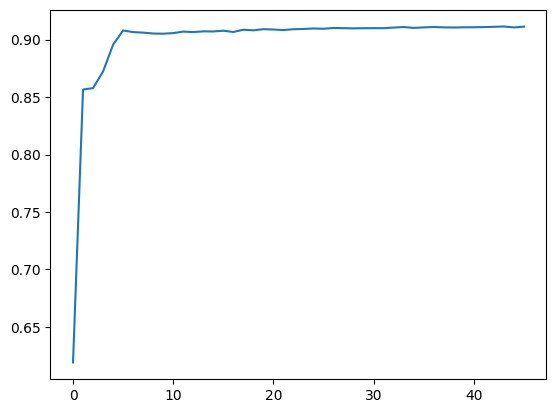

In [ ]:
# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'])

In [ ]:
from keras.utils import to_categorical

y_test = to_categorical(y_test, num_class)


model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 14ms/step - loss: 0.0419 - accuracy: 0.9088


[0.0419246181845665, 0.9087821841239929]

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Assuming 'y_true' is your true labels and 'y_pred' is your predicted labels
y_true = np.argmax(y_test, axis=2)
y_pred = np.argmax(model.predict(x_test), axis=2)

# Flatten the arrays for individual sample predictions
y_true_flat = y_true.flatten()
y_pred_flat = y_pred.flatten()


13/13 [==============================] - 0s 11ms/step


In [ ]:
print(classification_report(y_true_flat, y_pred_flat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     39307
           1       0.67      0.60      0.64      5271
           2       0.00      0.00      0.00       442
           3       0.00      0.00      0.00       320
           4       0.00      0.00      0.00        66
           5       0.00      0.00      0.00       136
           6       0.00      0.00      0.00        92
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00        91
           9       0.00      0.00      0.00       128

    accuracy                           0.91     45934
   macro avg       0.16      0.16      0.16     45934
weighted avg       0.88      0.91      0.89     45934



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#LSTM model

###Defining LSTM model

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length),
    tf.keras.layers.LSTM(units=64, return_sequences=True, dropout=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_class, activation='softmax'),
])


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 119, 50)           559200    
                                                                 
 lstm (LSTM)                 (None, 119, 64)           29440     
                                                                 
 dense_2 (Dense)             (None, 119, 512)          33280     
                                                                 
 dropout_1 (Dropout)         (None, 119, 512)          0         
                                                                 
 dense_3 (Dense)             (None, 119, 10)           5130      
                                                                 
Total params: 627050 (2.39 MB)
Trainable params: 627050 (2.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
LR = 1e-4
BATCH_SIZE = 32
EPOCHS = 50

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'NER_Model.h5',
    save_best_only=True,
    save_weights_only=True
)

early_stop = tf.keras.callbacks.EarlyStopping(
    min_delta=1e-4,
    patience=10
)


###Compiling and training the model

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='categorical_focal_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model1.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[early_stop, checkpoint])

Epoch 1/50
39/39 [==============================] - 7s 123ms/step - loss: 0.4426 - accuracy: 0.7567 - val_loss: 0.4024 - val_accuracy: 0.8631
Epoch 2/50
39/39 [==============================] - 3s 89ms/step - loss: 0.2609 - accuracy: 0.8566 - val_loss: 0.0804 - val_accuracy: 0.8631
Epoch 3/50
39/39 [==============================] - 4s 109ms/step - loss: 0.0788 - accuracy: 0.8566 - val_loss: 0.0689 - val_accuracy: 0.8631
Epoch 4/50
39/39 [==============================] - 4s 105ms/step - loss: 0.0663 - accuracy: 0.8566 - val_loss: 0.0596 - val_accuracy: 0.8631
Epoch 5/50
39/39 [==============================] - 4s 103ms/step - loss: 0.0601 - accuracy: 0.8565 - val_loss: 0.0560 - val_accuracy: 0.8631
Epoch 6/50
39/39 [==============================] - 4s 115ms/step - loss: 0.0578 - accuracy: 0.8582 - val_loss: 0.0546 - val_accuracy: 0.8631
Epoch 7/50
39/39 [==============================] - 4s 102ms/step - loss: 0.0563 - accuracy: 0.8626 - val_loss: 0.0531 - val_accuracy: 0.8698
Epoch 8

###Evaluating the LSTM model

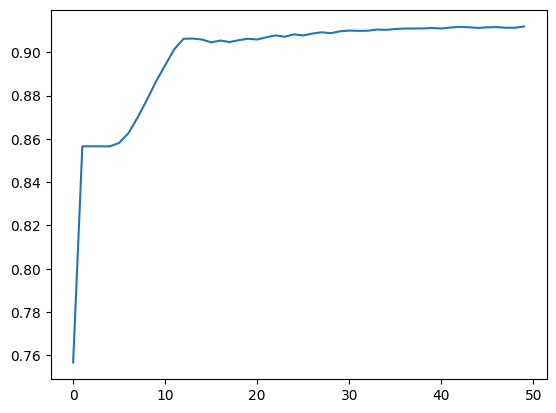

In [ ]:
# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [ ]:
model1.evaluate(x_test, y_test)

13/13 [==============================] - 0s 18ms/step - loss: 0.0415 - accuracy: 0.9087


[0.04145623371005058, 0.9086732864379883]

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Assuming 'y_true' is your true labels and 'y_pred' is your predicted labels
y_true = np.argmax(y_test, axis=2)
y_pred = np.argmax(model1.predict(x_test), axis=2)

# Flatten the arrays for individual sample predictions
y_true_flat = y_true.flatten()
y_pred_flat = y_pred.flatten()



13/13 [==============================] - 1s 16ms/step


In [ ]:
print(classification_report(y_true_flat, y_pred_flat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     39307
           1       0.67      0.60      0.64      5271
           2       0.00      0.00      0.00       442
           3       0.00      0.00      0.00       320
           4       0.00      0.00      0.00        66
           5       0.00      0.00      0.00       136
           6       0.00      0.00      0.00        92
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00        91
           9       0.00      0.00      0.00       128

    accuracy                           0.91     45934
   macro avg       0.16      0.16      0.16     45934
weighted avg       0.88      0.91      0.89     45934



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Part of speech tagging

In [ ]:
import stanza
import pandas as pd

stanza.download('ar')
nlp = stanza.Pipeline('ar', processors='tokenize,pos')

sample_size = 1000
sample_data = text['Token_cleaned'].iloc[:sample_size]

for sentence in sample_data:
    doc = nlp(sentence)

    for sent in doc.sentences:
        for word in sent.words:
            print(f"Word: {word.text}\t POS: {word.pos}")


INFO:stanza:Downloading default packages for language: ar (Arabic) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package     |
---------------------------
| tokenize  | padt        |
| mwt       | padt        |
| pos       | padt_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


Word: أكبر	 POS: ADJ
Word: مدينة	 POS: NOUN
Word: سويد	 POS: X
Word: سطوكهولم	 POS: X
Word: ݣوتنبور	 POS: X
Word: ݣ	 POS: X
Word: مالمو	 POS: X
Word: عدد	 POS: NOUN
Word: سكان	 POS: NOUN
Word: ديالها	 POS: X
Word: أوپيك	 POS: X
Word: لينݣليزية	 POS: X
Word: OPEC	 POS: X
Word: تاتعني	 POS: X
Word: لمنضمة	 POS: X
Word: لبلدان	 POS: NOUN
Word: اللي	 POS: X
Word: كاتصدر	 POS: X
Word: لپطرول	 POS: X
Word: منضمة	 POS: ADJ
Word: عالمية	 POS: ADJ
Word: تاتجمع	 POS: VERB
Word: بلدان	 POS: NOUN
Word: اللي	 POS: X
Word: تيعول	 POS: VERB
Word: لإقتصاد	 POS: X
Word: ديالها	 POS: X
Word: بزاف	 POS: X
Word: لپطرول	 POS: X
Word: تأسسات	 POS: NOUN
Word: هاد	 POS: X
Word: لمنضمة	 POS: X
Word: نهار	 POS: X
Word: شتنبر	 POS: NOUN
Word: بغداد	 POS: NOUN
Word: كانو	 POS: X
Word: لبدان	 POS: X
Word: لعراق	 POS: NOUN
Word: إيران	 POS: NOUN
Word: لكويت	 POS: X
Word: السعودية	 POS: NOUN
Word: ڤينيزويلا	 POS: X
Word: رحلات	 POS: NOUN
Word: لمنضمة	 POS: X
Word: ولأ	 POS: X
Word: لمقر	 POS: X
Word: ديالها	 POS: X


#Dependency parsing

In [ ]:
!pip install tabulate

In [ ]:
import stanza
from tabulate import tabulate

stanza.download('ar')
nlp = stanza.Pipeline('ar', processors='tokenize,pos,lemma,depparse')

sample_size = 1000
sample_data = text['Token_cleaned'].iloc[:sample_size]

for i in range(0, len(sample_data), 10):
    chunk = ' '.join(sample_data[i:i + 10])

    doc = nlp(chunk)

    chunk_results = []
    for sent in doc.sentences:
        for word in sent.words:
            head_word = sent.words[word.head - 1].text if word.head > 0 else "ROOT"
            result = [word.text, word.pos, word.lemma, head_word, word.deprel]
            chunk_results.append(result)

    print(f"Dependency Parsing for Chunk {i//10 + 1}:")
    headers = ["Word", "POS", "Lemma", "Head", "Dependency Relation"]
    print(tabulate(chunk_results, headers=headers, tablefmt="pretty"))
    print()


INFO:stanza:Downloading default packages for language: ar (Arabic) ...
INFO:stanza:File exists: /root/stanza_resources/ar/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| pos       | padt_charlm   |
| lemma     | padt_nocharlm |
| depparse  | padt_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Dependency Parsing for Chunk 1:
+----------+------+----------+----------+---------------------+
|   Word   | POS  |  Lemma   |   Head   | Dependency Relation |
+----------+------+----------+----------+---------------------+
|   أكبر   | ADJ  |   أَكبَر   |   ROOT   |        root         |
|  مدينة   | NOUN |  مَدِينَة   |   أكبر   |        nmod         |
|   سويد   |  X   |   سويد   | ݣوتنبورݣ |        nmod         |
| سطوكهولم |  X   | سطوكهولم | ݣوتنبورݣ |        nmod         |
| ݣوتنبورݣ |  X   | ݣوتنبورݣ |  مدينة   |        nmod         |
|  مالمو   |  X   |  مالمو   |  مدينة   |        nmod         |
|   عدد    | NOUN |   عَدَد    |   أكبر   |        nsubj        |
|   سكان   | NOUN |   سَاكِن   |   عدد    |        nmod         |
|   ديال   | NOUN |   دَال    |   سكان   |        nmod         |
|    ها    | PRON |    هُوَ    |   ديال   |        nmod         |
|  أوپيك   |  X   |  أوپيك   |   ديال   |        nmod         |
+----------+------+----------+----------+-------------------